# Keras- 다중분류 실습 
### 로이터 뉴스 기사 분류 
- 46개의 상호 배타적 토픽으로 분류
- 로이터 Dataset
  - 1986년 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합 
  - 46개의 토픽
  - 각 토픽은 훈련세트에 최소한 10개의 샘플을 가지고 있음 

In [1]:
# 데이터 로드 
from keras.datasets import reuters 
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [13]:
# 데이터 길이 확인 
print(len(train_data))
print(len(test_data))

8982
2246


In [14]:
# 데이터 확인 
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [15]:
print(train_labels[0])

3


* 데이터 준비 (데이터를 벡터로 변환)

In [2]:
import numpy as np

def vectorize_sequence(seqs, dim=10000):
  results = np.zeros((len(seqs), dim))
  for i, seq in enumerate(seqs):
    results[i, seq] = 1.    # 특정 인덱스의 위치를 1.으로 만듬 
  return results 

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

* 레이블을 벡터로 변환 (one-hot encoding)

In [3]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [4]:
# 함수를 직접 만들어서 사용해도됨 
# 그렇지만 잘 사용 하지 않음 

def to_one_hot(labels, dim=46):
  results = np.zeros((len(labels), dim))
  for i, l in enumerate(labels):
    results[i, l] = 1.    # 특정 인덱스의 위치를 1.으로 만듬 
  return results 

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

* 모델 구성 
  - 출력 클래스의 개수가 2개에서 46개로 늘어남 (= 출력 공간의 차원이 훨씬 커짐) 
  - Dense 층을 쌓으면 각 층은 이전 층의 출력에서 제공한 정보만 사용가능 
  - 한 층이 분류문제에 필요한 일부 정보를 누락하면 그 다음 층에서 이를 복원 할 수 없음 


In [4]:
from keras import models 
from keras import layers 

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
# 마지막 층: 각 입력 샘플에 대해 46차원 벡터를 출력, 이 벡터의 각 원소는 각기 다른 출력 클래스가 인코딩 된 것 
# sofmax 활성화 함수 : 46개의 출력 클래스에 대한 '확률분포'출력, 46차원 출력 벡터를 만들어 output[i]는 어떤 샘플이 클래스 i에 속할 확률 
model.add(layers.Dense(46, activation='softmax'))

* 훈련 검증 
  - 훈련 데이터에서 1000개의 샘플을 따로 떼어 검증세트로 사용 

In [5]:
x_val = x_train[:1000]
partial_x_trian = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [6]:
# 20번의 에포크로 모델을 훈련 
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_trian, partial_y_train, epochs= 20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 62ms/step - loss: 2.4838 - accuracy: 0.5499 - val_loss: 1.6710 - val_accuracy: 0.6460
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.3780 - accuracy: 0.7108 - val_loss: 1.2936 - val_accuracy: 0.7180
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 1.0366 - accuracy: 0.7795 - val_loss: 1.1401 - val_accuracy: 0.7390
Epoch 4/20
16/16 [==============================] - 1s 47ms/step - loss: 0.8177 - accuracy: 0.8306 - val_loss: 1.0322 - val_accuracy: 0.7770
Epoch 5/20
16/16 [==============================] - 1s 47ms/step - loss: 0.6499 - accuracy: 0.8649 - val_loss: 0.9596 - val_accuracy: 0.7960
Epoch 6/20
16/16 [==============================] - 1s 47ms/step - loss: 0.5188 - accuracy: 0.8955 - val_loss: 0.9138 - val_accuracy: 0.8180
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 0.4139 - accuracy: 0.9158 - val_loss: 0.8910 - val_accuracy: 0.8240
Epoch 8/20
16

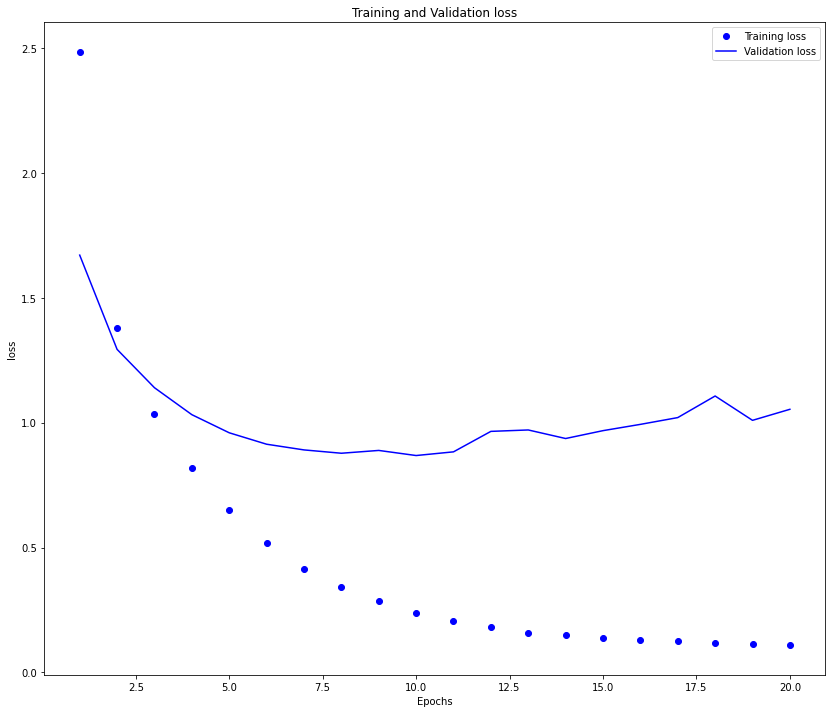

In [7]:
# Train data에 최적화된 상태라 overfitting이 발생함 
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(14,12))
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

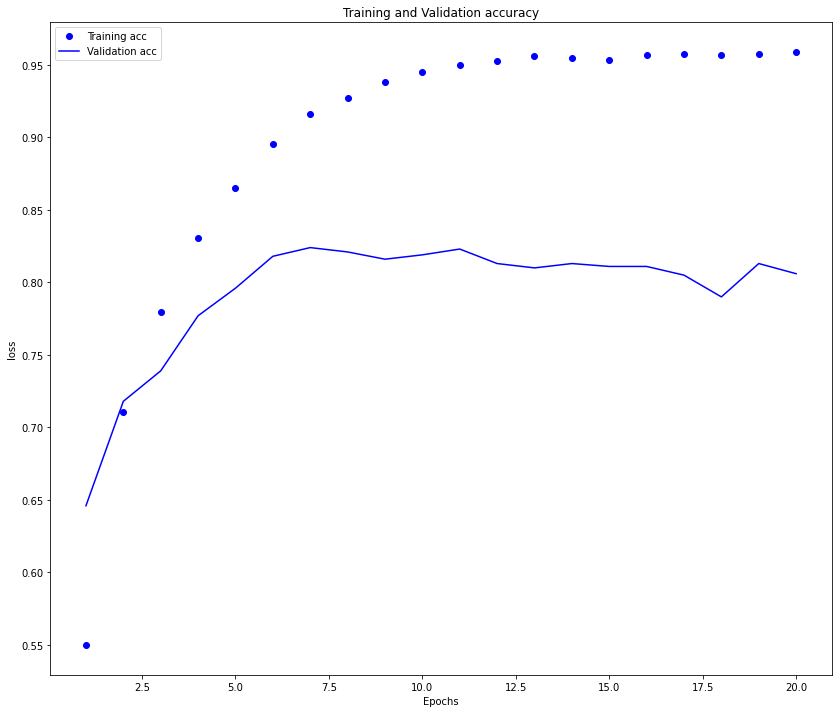

In [8]:
# accuracy 확인하기 
# 9번째 epoch 에서 역전됨 
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.figure(figsize=(14,12))
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

* 9번째 에포크에서 과대적합 시작 

In [11]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_trian, partial_y_train, epochs=9, batch_size=512)
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/9
16/16 [==============================] - 1s 44ms/step - loss: 2.6820 - accuracy: 0.5238
Epoch 2/9
16/16 [==============================] - 1s 44ms/step - loss: 1.4237 - accuracy: 0.7127
Epoch 3/9
16/16 [==============================] - 1s 44ms/step - loss: 1.0263 - accuracy: 0.7840
Epoch 4/9
16/16 [==============================] - 1s 43ms/step - loss: 0.8034 - accuracy: 0.8280
Epoch 5/9
16/16 [==============================] - 1s 43ms/step - loss: 0.6402 - accuracy: 0.8638
Epoch 6/9
16/16 [==============================] - 1s 44ms/step - loss: 0.5110 - accuracy: 0.8940
Epoch 7/9
16/16 [==============================] - 1s 45ms/step - loss: 0.4124 - accuracy: 0.9163
Epoch 8/9
16/16 [==============================] - 1s 45ms/step - loss: 0.3370 - accuracy: 0.9290
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9458 - accuracy: 0.7934
[0.9458222985267639, 0.7934104800224304]


* 새로운 데이터에 대해 예측 

In [12]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [14]:
# 마지막 층 sofmax 활성화 함수 사용으로 46개의 값을 모두 더하면 1 
np.sum(predictions[0])

1.0000001

In [15]:
np.argmax(predictions[0])

3

* 충분히 큰 중간층을 두어야 하는 이유
  - 마지막 출력이 46차원 이므로, 중간 층의 히든 유닛이 46보다 많이 적어서는 안됨 
  - 정확성이 떨어짐 

In [20]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_trian, partial_y_train, epochs=9, batch_size=512)
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/9
16/16 [==============================] - 1s 46ms/step - loss: 3.7186 - accuracy: 0.0291
Epoch 2/9
16/16 [==============================] - 1s 44ms/step - loss: 3.4871 - accuracy: 0.0575
Epoch 3/9
16/16 [==============================] - 1s 44ms/step - loss: 3.2550 - accuracy: 0.1027
Epoch 4/9
16/16 [==============================] - 1s 44ms/step - loss: 3.0049 - accuracy: 0.1165
Epoch 5/9
16/16 [==============================] - 1s 45ms/step - loss: 2.7232 - accuracy: 0.1847
Epoch 6/9
16/16 [==============================] - 1s 44ms/step - loss: 2.4332 - accuracy: 0.3115
Epoch 7/9
16/16 [==============================] - 1s 42ms/step - loss: 2.1742 - accuracy: 0.3042
Epoch 8/9
16/16 [==============================] - 1s 43ms/step - loss: 1.9089 - accuracy: 0.3673
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 1.8215 - accuracy: 0.6082
[1.8214852809906006, 0.6081923246383667]
